# Tarea 1

## Aleksei Ithan García Díaz

### Fonética

#### Ejercicio 1

Si tenemos un sistema de búsqueda que recibe una palabra ortográfica y devuelve sus transcripciones fonológicas, proponga una solución para los casos en que la palabra buscada no se encuentra en el lexicón/diccionario. ¿Cómo devolver o aproximar su transcripción fonológica?

*Reutiliza el sistema de búsqueda visto en clase y mejoralo con esta funcionalidad*

##### Solucion

La solución posible sería utilizar alguna medida de similitud mediante las palabras escritas, es decir, si recibimos una palabra la cual no se encuentra presente en nuestro diccionario del IPA, podemos buscar algunas otras palabras similares y con base en eso dar una posible representación fonética.

In [21]:
#Distancia levenshtein a otras palabras
#Despomposicion silabica
#Clustering Fonetico
#Phonemizer, Epitran
import heapq
from nltk.metrics import edit_distance
from nltk.util import ngrams
from nltk.metrics import jaccard_distance

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

from rich import print as rprint
from rich.columns import Columns
from rich.panel import Panel
from rich.text import Text

import http

import requests as r
from pprint import pprint as pp
import pandas as pd
import numpy as np

In [6]:
IPA_URL = "https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/{lang}.txt"# Dejando como idiomas con alfabeto latino

lang_codes = {
    # "ar": "Arabic (Modern Standard)",  # Usa el alfabeto árabe

    "de": "German",  # Alfabeto latino
    "en_UK": "English (Received Pronunciation)",  # Alfabeto latino
    "en_US": "English (General American)",  # Alfabeto latino
    "eo": "Esperanto",  # Alfabeto latino
    "es_ES": "Spanish (Spain)",  # Alfabeto latino
    "es_MX": "Spanish (Mexico)",  # Alfabeto latino

    # "fa": "Persian",  # Usa el alfabeto persa (derivado del árabe)

    "fi": "Finnish",  # Alfabeto latino
    "fr_FR": "French (France)",  # Alfabeto latino
    "fr_QC": "French (Québec)",  # Alfabeto latino
    "is": "Icelandic",  # Alfabeto latino

    # "ja": "Japanese",  # Usa kanji, hiragana y katakana

    "jam": "Jamaican Creole",  # Alfabeto latino

    # "km": "Khmer",  # Usa el alfabeto jemer
    # "ko": "Korean",  # Usa el hangul

    "ma": "Malay (Malaysian and Indonesian)",  # Alfabeto latino
    "nb": "Norwegian Bokmål",  # Alfabeto latino
    "nl": "Dutch",  # Alfabeto latino

    # "or": "Odia",  # Usa el alfabeto odia

    "ro": "Romanian",  # Alfabeto latino
    "sv": "Swedish",  # Alfabeto latino
    "sw": "Swahili",  # Alfabeto latino

    # "tts": "Isan",  # Usa el alfabeto tailandés

    "vi_C": "Vietnamese (Central)",  # Usa el alfabeto latino con diacríticos
    "vi_N": "Vietnamese (Northern)",  # Usa el alfabeto latino con diacríticos
    "vi_S": "Vietnamese (Southern)",  # Usa el alfabeto latino con diacríticos

    # "yue": "Cantonese",  # Usa caracteres chinos
    # "zh_hans": "Mandarin (Simplified)",  # Usa caracteres chinos simplificados
    # "zh_hant": "Mandarin (Traditional)"  # Usa caracteres chinos tradicionales
}

iso_lang_codes = list(lang_codes.keys())

In [7]:
def get_formated_string(code: str, name: str):
    return f"[b]{name}[/b]\n[yellow]{code}"

def parse_response(response: str) -> dict:
    """Parse text response from ipa-dict to python dict

    Each row have the format:
    [WORD][TAB]/[IPA]/(, /[IPA]/)?

    Parameters
    ----------
    response: str
        ipa-dict raw text

    Returns
    -------
    dict:
        A dictionary with the word as key and the phonetic
        representations as value
    """
    ipa_list = response.rstrip().split("\n")
    result = {}
    for item in ipa_list:
        if item == '':
            continue
        item_list = item.split("\t")
        result[item_list[0]] = item_list[1]
    return result


def download_ipa_corpus(iso_lang: str) -> str:
    """Get ipa-dict file from Github

    Parameters:
    -----------
    iso_lang:
        Language as iso code

    Results:
    --------
    dict:
        Dictionary with words as keys and phonetic representation
        as values for a given lang code
    """
    print(f"Downloading {iso_lang}", end="::")
    response = r.get(IPA_URL.format(lang=iso_lang))
    status_code = response.status_code
    print(f"status={status_code}")
    if status_code != http.HTTPStatus.OK:
        print(f"ERROR on {iso_lang} :(")
        return ""
    return response.text


def get_corpora() -> dict:
    """Download corpora from ipa-dict github

    Given a list of iso lang codes download available datasets.

    Returns
    -------
    dict
        Lang codes as keys and dictionary with words-transcriptions
        as values
    """
    return {code: parse_response(download_ipa_corpus(code)) for code in iso_lang_codes}


def get_ipa_transcriptions(word: str, dataset: dict) -> list[str]:
    """Search for a word in an IPA phonetics dict

    Given a word this function return the IPA transcriptions

    Parameters:
    -----------
    word: str
        A word to search in the dataset
    dataset: dict
        A dataset for a given language code

    Returns
    -------
    list[str]:
        List with posible transcriptions if any,
        else an empty list
    """
    return dataset.get(word.lower(), "").split(", ")

data = get_corpora()

In [19]:
data = get_corpora()

status=200g en_US::
status=200g eo::
status=200g es_ES::
status=200g fr_FR::
status=200g fr_QC::
status=200g is::
status=200g jam::
status=200g ma::
status=200g nb::
status=200g nl::
status=200g ro::
status=200g sv::
status=200g sw::
status=200g vi_C::
status=200g vi_N::


In [41]:
N_SIMILAR = 3
def aproximacion_fonetica(funcion_simitud):
  '''
  Función que regresa aproximaciones de transcripciones fonéticas para palabras
  que no están en el lexicón

  Input:
    funcion_simitud: funcion a usar para encontrar las palabras más
    similares.

  Output:
    Regresa la transcripción fonética, ya sea la que le pertence o una
    aproximación.
  '''
  rprint(Panel(Text("Representación fonética de palabras", style="bold", justify="center")))
  rendable_langs = [Panel(get_formated_string(code, lang), expand=True) for code, lang in lang_codes.items()]
  rprint(Columns(rendable_langs))

  lang = input("lang>> ")
  # lang = 'es_MX'
  rprint(f"Selecciona un idioma: {lang_codes[lang]} \n\tSi quieres salir solo pon X.") if lang else rprint("Adios 👋🏼")
  while lang:
      sub_dataset = data[lang]
      query = input(f"  [{lang}]word>> ")

      if query=='X':
        break;

      results = get_ipa_transcriptions(query, sub_dataset)

      if results == ['']: # En caso que no exista su transcripción fonética
        print(f"Las {N_SIMILAR} aproximaciones fonéticas:")

        palabras_similares = funcion_simitud(query, sub_dataset)
        # print(palabras_similares)

        for palabra_similar in palabras_similares:
          results = get_ipa_transcriptions(palabra_similar, sub_dataset)
          rprint(palabra_similar, " | ", ", ".join(results))

      else:
        rprint(query, " | ", ", ".join(results))

  rprint("Adios 👋🏼")
  return


def jaccard_similarity(word1, word2, n=2):
    set1 = set(ngrams(word1,n))
    set2 = set(ngrams(word2,n))
    return 1 - jaccard_distance(set1,set2)

def get_similar_words_jaccard(query, dataset, n_similar=3):
    """
    Regresa las n palabras más similares con la distancia de Jaccard.

    Input:
      query: palabra que no está en el dataset.
      dataset: conjunto de datos del idioma ingresado (diccionario palabra: fonemas).
      similar: número de palabras similares a devolver (por defecto 3).

    Output:
      Regresa las n palabras más similares con la query.
    """
    similarities = []
    for word, code in dataset.items():
        similarity = jaccard_similarity(query, word)
        similarities.append((word, similarity))
    
    similarities.sort(key=lambda x: -x[1])

    return {word:code for word, code in similarities[:n_similar]}

print("Test:", get_similar_words_jaccard("wed", data["en_US"],N_SIMILAR))    

Test: {'wed': 1.0, 'awed': 0.6666666666666667, 'owed': 0.6666666666666667}


In [43]:
aproximacion_fonetica(get_similar_words_jaccard)

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                       Representación fonética de palabras                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ German                │ │ English (Received Pronunciation) │ │ English (General American)       │
│ de                    │ │ en_UK                            │ │ en_US                            │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Esperanto             │ │ Spanish (Spain)                  │ │ Spanish (Mexico)                 │
│ eo                    │ │ es_ES                            │ │ es_MX                            │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Finnish               │ │ French (France)                  │ │ French (Québec)                  │
│ fi                    │ │ fr_FR                            │ │ fr_QC                            │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Icelandic             │ │ Jamaican Creole                  │ │ Malay (Malaysian and Indonesian) │
│ is                    │ │ jam                              │ │ ma                               │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Norwegian Bokmål      │ │ Dutch                            │ │ Romanian                         │
│ nb                    │ │ nl                               │ │ ro                               │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Swedish               │ │ Swahili                          │ │ Vietnamese (Central)             │
│ sv                    │ │ sw                               │ │ vi_C                             │
╰───────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────────────────╮                                     
│ Vietnamese (Northern) │ │ Vietnamese (Southern)            │                                     
│ vi_N                  │ │ vi_S                             │                                     
╰───────────────────────╯ ╰──────────────────────────────────╯

lang>>  es_MX


Selecciona un idioma: Spanish (Mexico) 
        Si quieres salir solo pon X.

  [es_MX]word>>  papear


Las 3 aproximaciones fonéticas:


apear  |  /apeaɾ/

papelear  |  /papeleaɾ/

sopapear  |  /sopapeaɾ/

  [es_MX]word>>  X


Adios 👋🏼

#### Ejercicio 2

In [44]:
LANGS = {
    "ces": "Czech",
    "eng": "English",
    "fra": "French",
    "hun": "Hungarian",
    "spa": "Spanish",
    "ita": "Italian",
    "lat": "Latin",
    "rus": "Russian",
}
CATEGORIES = {
    "100": "Inflection",
    "010": "Derivation",
    "101": "Inflection, Compound",
    "000": "Root",
    "011": "Derivation, Compound",
    "110": "Inflection, Derivation",
    "001": "Compound",
    "111": "Inflection, Derivation, Compound"
}

In [45]:
def get_track_files(lang: str, track: str = "word") -> list[str]:
    """Genera una lista de nombres de archivo del shared task

    Con base en el idioma y el track obtiene el nombre de los archivos
    para con información reelevante para hacer análisis estadístico.
    Esto es archivos .test y .dev

    Parameters:
    ----------
    lang : str
        Idioma para el cual se generarán los nombres de archivo.
    track : str, optional
        Track del shared task de donde vienen los datos (por defecto es "word").

    Returns:
    -------
    list[str]
        Una lista de nombres de archivo generados para el idioma y la pista especificados.
    """
    return [
        f"{lang}.{track}.test.gold",
        f"{lang}.{track}.dev",
    ]


def get_raw_corpus(files: list) -> list:
    """Descarga y concatena los datos de los archivos tsv desde una URL base.

    Parameters:
    ----------
    files : list
        Lista de nombres de archivos (sin extensión) que se descargarán
        y concatenarán.

    Returns:
    -------
    list
        Una lista que contiene los contenidos descargados y concatenados
        de los archivos tsv.
    """
    result = []
    for file in files:
        print(f"Downloading {file}.tsv", end=" ")
        response = r.get(f"https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/{file}.tsv")
        print(f"status={response.status_code}")
        lines = response.text.split("\n")
        result.extend(lines[:-1])
    return result


import pandas as pd

def raw_corpus_to_dataframe(corpus_list: list, lang: str) -> pd.DataFrame:
    """Convierte una lista de datos de corpus en un DataFrame

    Parameters:
    ----------
    corpus_list : list
        Lista de líneas del corpus a convertir en DataFrame.
    lang : str
        Idioma al que pertenecen los datos del corpus.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame de pandas que contiene los datos del corpus procesados.
    """
    data_list = []
    for line in corpus_list:
        try:
            word, tagged_data, category = line.split("\t")
        except ValueError:
            # Caso donde no existe la categoria
            word, tagged_data = line.split("\t")
            category = "NOT_FOUND"
        morphemes = tagged_data.split()
        data_list.append({"words": word, "morph": morphemes, "category": category, "lang": lang})
    df = pd.DataFrame(data_list)
    df["word_len"] = df["words"].apply(lambda x: len(x))
    df["morph_count"] = df["morph"].apply(lambda x: len(x))
    return df

In [47]:
df_languages = []
for idioma in LANGS.keys():
    files = get_track_files(idioma)
    raw_spa = get_raw_corpus(files)
    df_languages.append(raw_corpus_to_dataframe(raw_spa, lang=idioma))

status=200g ces.word.dev.tsv 
status=200g eng.word.test.gold.tsv 
status=200g eng.word.dev.tsv 
status=200g fra.word.dev.tsv 
status=200g hun.word.dev.tsv 
status=200g spa.word.dev.tsv 
status=200g ita.word.dev.tsv 
status=200g lat.word.dev.tsv 


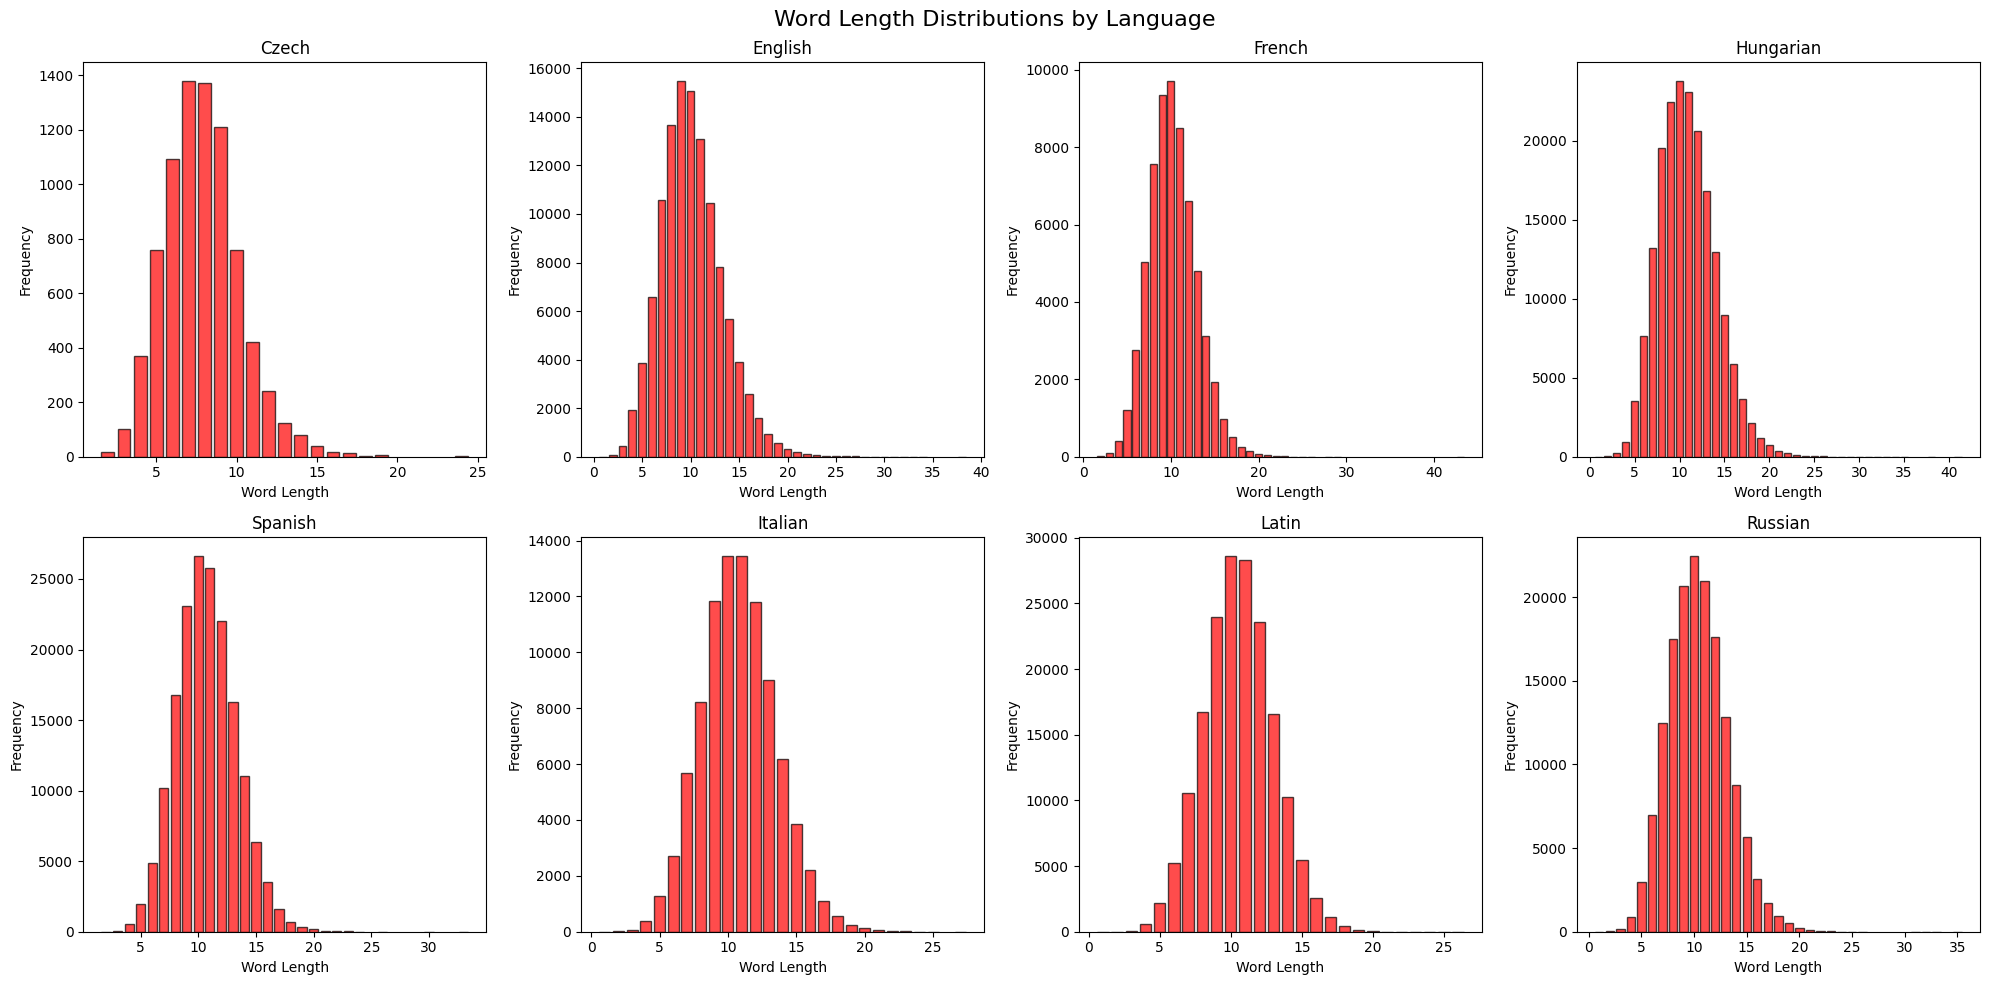

In [77]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Word Length Distributions by Language', fontsize=16)

for i, lang_df in enumerate(df_languages):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    language = LANGS.get(lang_df['lang'].iloc[0], lang_df['lang'].iloc[0])
    ax.set_title(language, fontsize=12)
    
    word_lengths = lang_df['words'].apply(len)
    frequencies = Counter(word_lengths)
    
    x_values, y_values = zip(*sorted(frequencies.items()))
    ax.bar(x_values, y_values, color='red', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Word Length', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

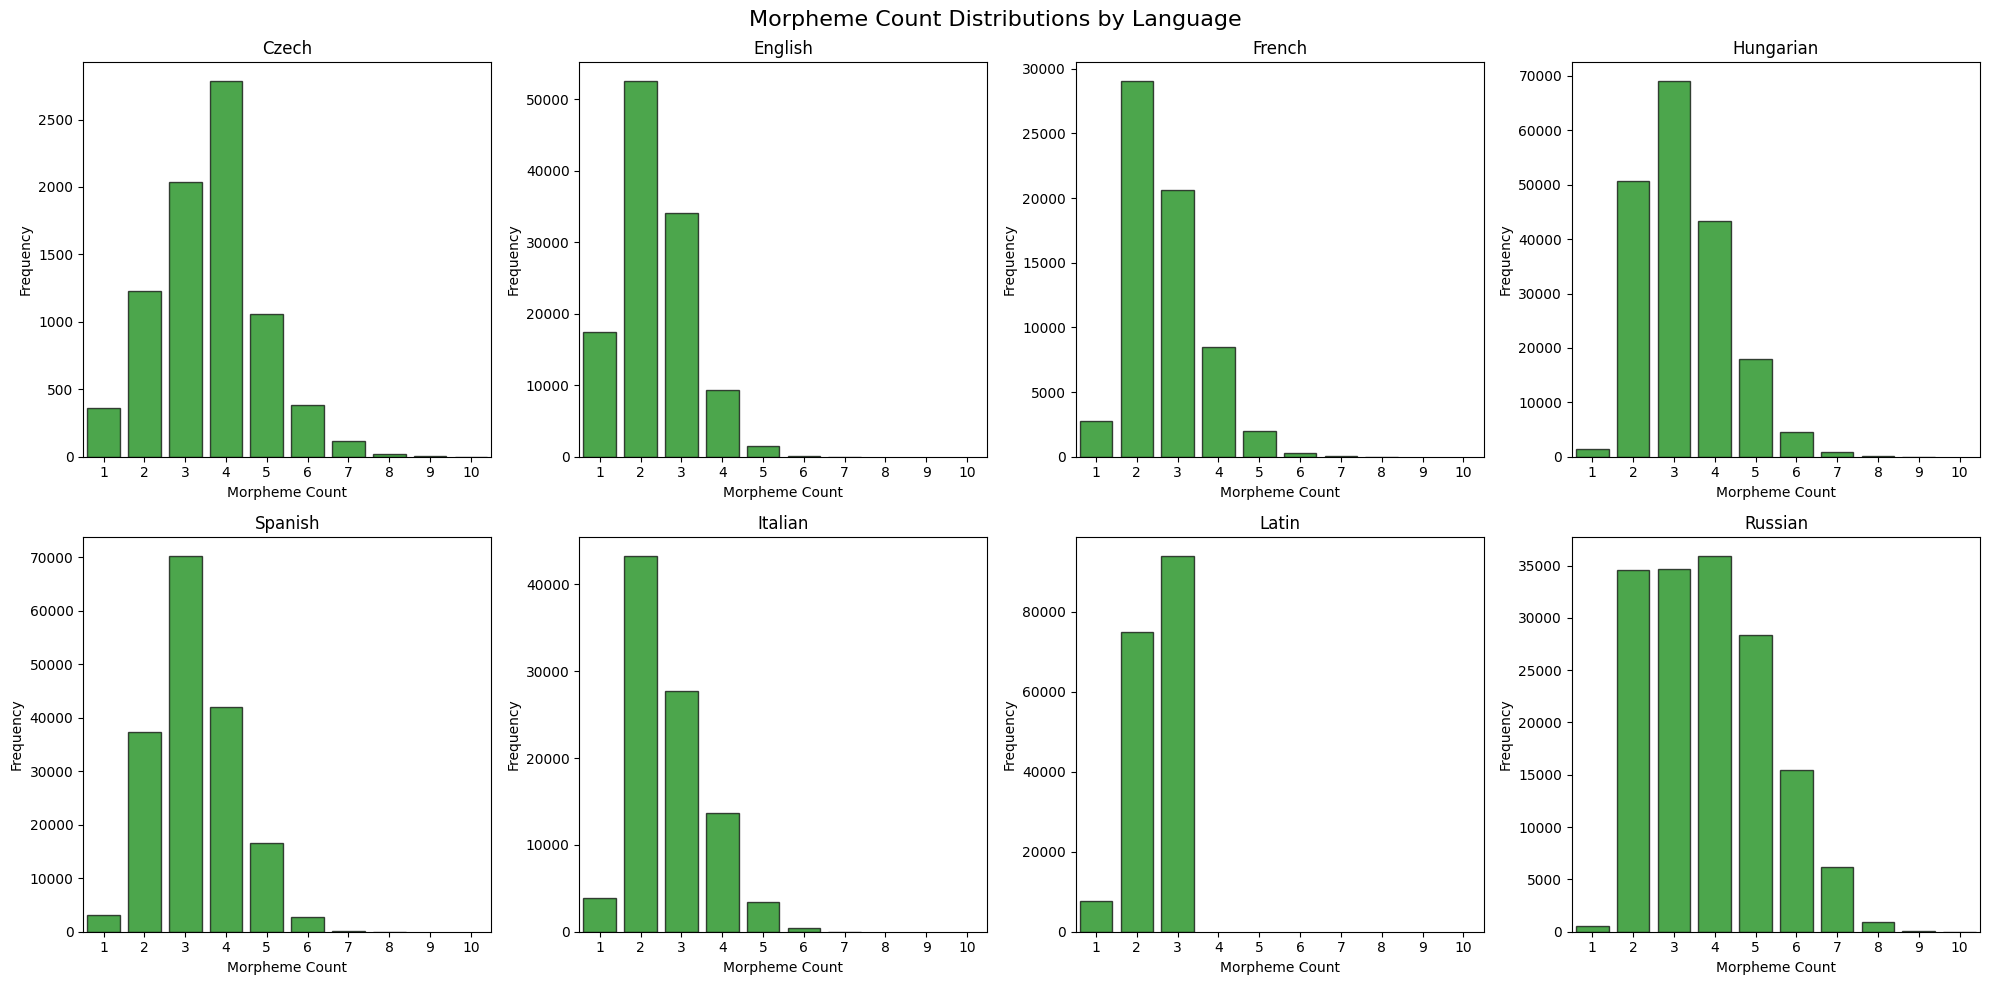

In [78]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Morpheme Count Distributions by Language', fontsize=16)

for i, lang_df in enumerate(df_languages):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    language = LANGS.get(lang_df['lang'].iloc[0], lang_df['lang'].iloc[0])
    ax.set_title(language, fontsize=12)
    
    morpheme_counts = lang_df['morph'].apply(len)
    frequencies = Counter(morpheme_counts)
    
    x_values, y_values = zip(*sorted(frequencies.items()))
    ax.bar(x_values, y_values, color='green', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Morpheme Count', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_xlim(0.5, 10.5)
    ax.set_xticks(range(1, 11))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

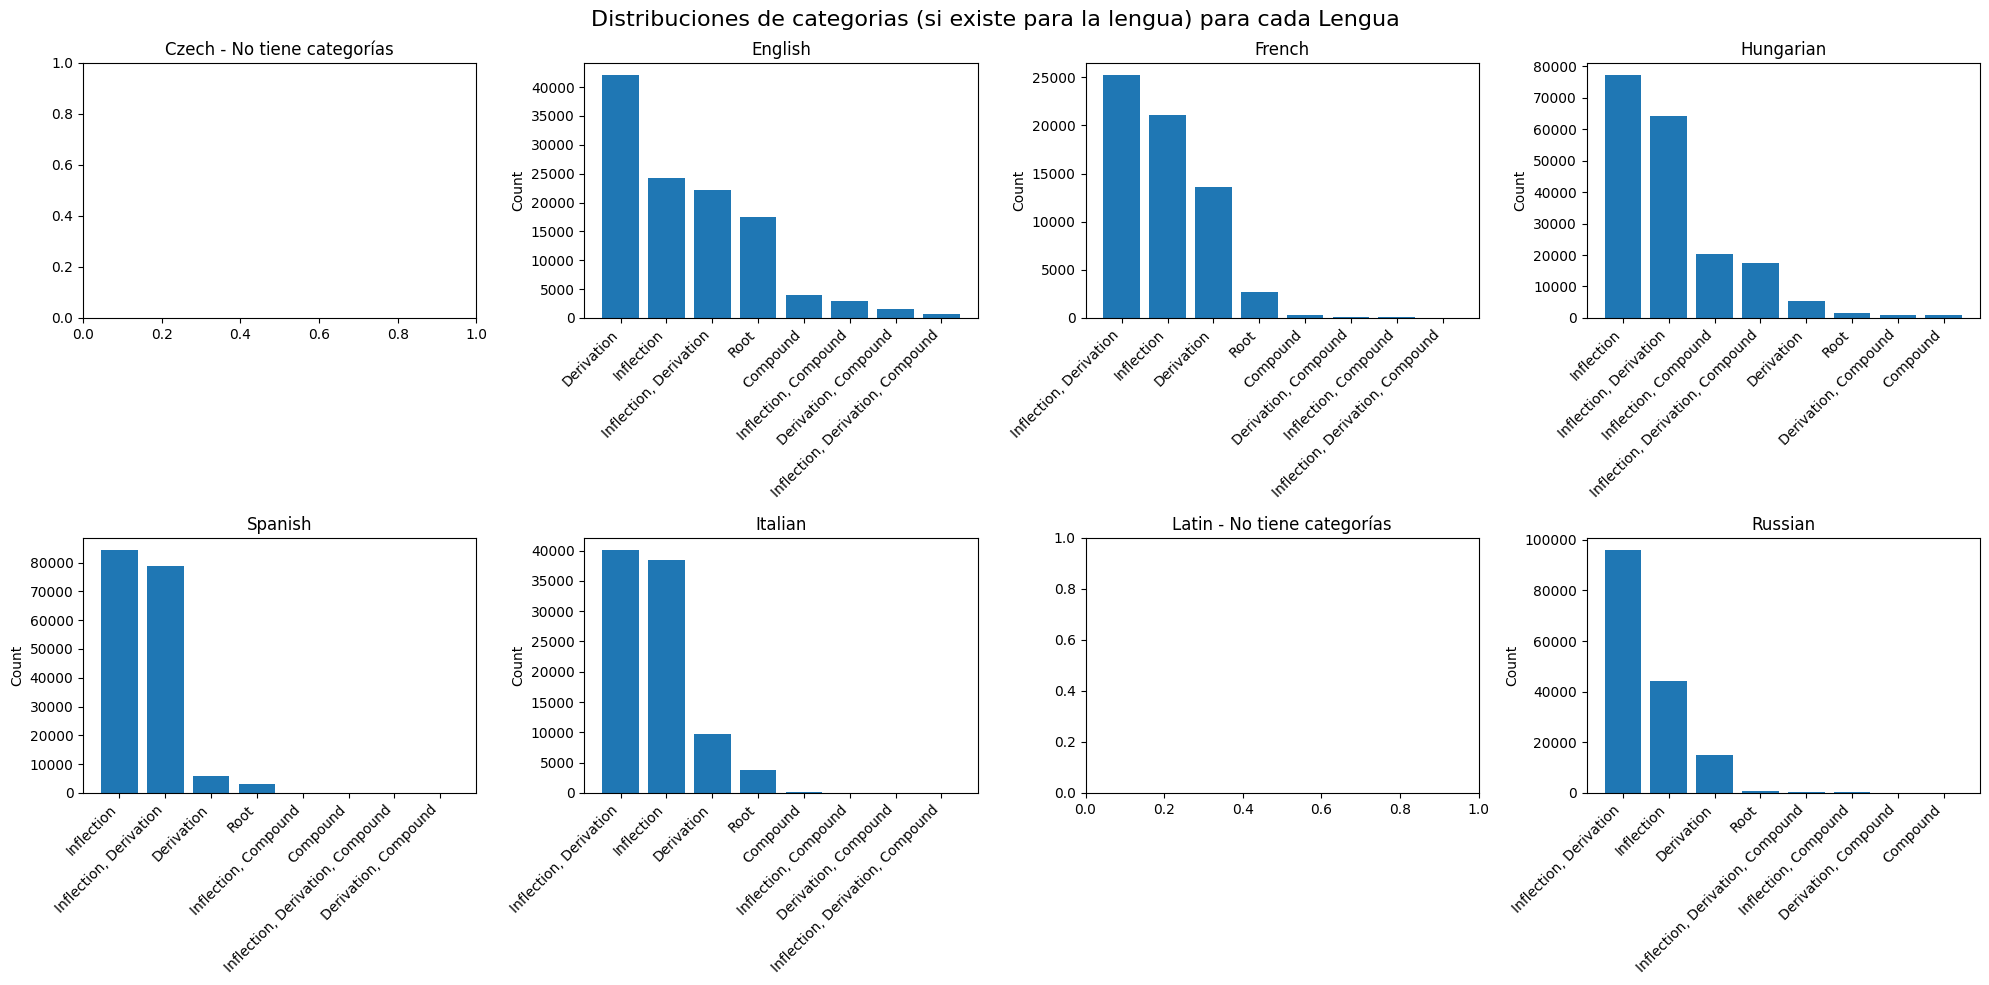

In [79]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuciones de categorias (si existe para la lengua) para cada Lengua', fontsize=16)

for i, lang_df in enumerate(df_languages):
  row = i // 4
  col = i % 4
  ax = axes[row, col]

  language = lang_df['lang'].iloc[0]
  language = LANGS[language]
  distribution_categories = lang_df['category'].value_counts()

  keys = list(dict(distribution_categories).items())

  if keys[0][0] != 'NOT_FOUND':
      ax.set_title(language)
      # Mapear las categorías numéricas a descripciones
      mapped_categories = {CATEGORIES[key]: count for key, count in distribution_categories.items() if key in CATEGORIES}

      ax.bar(mapped_categories.keys(), mapped_categories.values())
      ax.set_xticks(range(len(mapped_categories)))
      ax.set_xticklabels(mapped_categories.keys(), rotation=45, ha='right')
      ax.set_ylabel('Count')
  else:
    ax.set_title(language +" - Sin categorías")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [75]:
from IPython.display import display
import operator
import numpy as np
from rich.console import Console
from rich.table import Table
from rich.panel import Panel

def extract_language_information(language_dfs):
    """
    Extracts language information:
      - Total words
      - Average word length
      - Average morpheme count
      - Most common category
    
    Parameters:
        language_dfs (list): List of dataframes, each representing a language.
    
    Output:
        Displays extracted information in a formatted table using Rich.
    """
    console = Console()
    
    for lang_df in language_dfs:
        language = LANGS.get(lang_df['lang'].iloc[0], lang_df['lang'].iloc[0])
        
        total_words = len(lang_df['words'].values)
        avg_word_length = np.mean([len(word) for word in lang_df['words'].values])
        avg_morpheme_count = np.mean([len(morph) for morph in lang_df['morph'].values])
        
        category_distribution = lang_df['category'].value_counts()
        
        if category_distribution.empty or category_distribution.index[0] == 'NOT_FOUND':
            most_common_category = 'No categories available'
        else:
            mapped_categories = {CATEGORIES[key]: count for key, count in category_distribution.items() if key in CATEGORIES}
            most_common_category = max(mapped_categories.items(), key=operator.itemgetter(1))[0]
        
        # Create a Rich table
        table = Table(show_header=True, header_style="bold cyan")
        table.add_column("Metric", style="bold")
        table.add_column("Value", style="dim")
        
        table.add_row("Total Words", str(total_words))
        table.add_row("Avg Word Length", f"{avg_word_length:.2f}")
        table.add_row("Avg Morpheme Count", f"{avg_morpheme_count:.2f}")
        table.add_row("Most Common Category", most_common_category)
        
        console.print(Panel(table, title=f"[bold yellow]Language: {language}", expand=False))


In [76]:
extract_language_information(df_languages)

╭───────────────── Language: Czech ──────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value                   ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Total Words          │ 8000                    │ │
│ │ Avg Word Length      │ 7.84                    │ │
│ │ Avg Morpheme Count   │ 3.59                    │ │
│ │ Most Common Category │ No categories available │ │
│ └──────────────────────┴─────────────────────────┘ │
╰────────────────────────────────────────────────────╯

╭────────── Language: English ──────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value      ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩ │
│ │ Total Words          │ 115126     │ │
│ │ Avg Word Length      │ 10.11      │ │
│ │ Avg Morpheme Count   │ 2.35       │ │
│ │ Most Common Category │ Derivation │ │
│ └──────────────────────┴────────────┘ │
╰───────────────────────────────────────╯

╭──────────────── Language: French ─────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value                  ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Total Words          │ 63173                  │ │
│ │ Avg Word Length      │ 10.20                  │ │
│ │ Avg Morpheme Count   │ 2.67                   │ │
│ │ Most Common Category │ Inflection, Derivation │ │
│ └──────────────────────┴────────────────────────┘ │
╰───────────────────────────────────────────────────╯

╭───────── Language: Hungarian ─────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value      ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩ │
│ │ Total Words          │ 188074     │ │
│ │ Avg Word Length      │ 10.86      │ │
│ │ Avg Morpheme Count   │ 3.23       │ │
│ │ Most Common Category │ Inflection │ │
│ └──────────────────────┴────────────┘ │
╰───────────────────────────────────────╯

╭────────── Language: Spanish ──────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value      ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩ │
│ │ Total Words          │ 172173     │ │
│ │ Avg Word Length      │ 10.69      │ │
│ │ Avg Morpheme Count   │ 3.24       │ │
│ │ Most Common Category │ Inflection │ │
│ └──────────────────────┴────────────┘ │
╰───────────────────────────────────────╯

╭──────────────── Language: Italian ────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value                  ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Total Words          │ 92304                  │ │
│ │ Avg Word Length      │ 10.80                  │ │
│ │ Avg Morpheme Count   │ 2.68                   │ │
│ │ Most Common Category │ Inflection, Derivation │ │
│ └──────────────────────┴────────────────────────┘ │
╰───────────────────────────────────────────────────╯

╭───────────────── Language: Latin ──────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value                   ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Total Words          │ 176467                  │ │
│ │ Avg Word Length      │ 10.55                   │ │
│ │ Avg Morpheme Count   │ 2.49                    │ │
│ │ Most Common Category │ No categories available │ │
│ └──────────────────────┴─────────────────────────┘ │
╰────────────────────────────────────────────────────╯

╭──────────────── Language: Russian ────────────────╮
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Metric               ┃ Value                  ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Total Words          │ 156846                 │ │
│ │ Avg Word Length      │ 10.41                  │ │
│ │ Avg Morpheme Count   │ 3.85                   │ │
│ │ Most Common Category │ Inflection, Derivation │ │
│ └──────────────────────┴────────────────────────┘ │
╰───────────────────────────────────────────────────╯